In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
adult_df=pd.read_csv(r'C:\Users\tejas\Downloads\adult_data.csv',
                     header=None, delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Preprocessing Data

In [5]:
#create a copy of dataframe
adult_df_rev=pd.DataFrame.copy(adult_df)

In [6]:
adult_df_rev.drop(["education","fnlwgt"],axis=1,inplace=True)
adult_df_rev.shape

(32561, 13)

In [7]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [10]:
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(29096, 13)

In [11]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [12]:
adult_df_rev.isnull().sum()

age                  0
workclass         1632
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income               0
dtype: int64

In [13]:
adult_df_rev.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [14]:
#replace the missing values with mode values
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [15]:
adult_df_rev.workclass.mode()[0]

'Private'

In [16]:
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
#this always your second hand aproach
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [18]:
adult_df_rev.workclass.value_counts()

Private             21253
Self-emp-not-inc     2473
Local-gov            2040
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

# Dummy Variables using pd.get_dummies()

In [19]:
adult_df_rev_new=pd.get_dummies(adult_df_rev,drop_first=True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
adult_df_rev_new.shape

(29096, 82)

In [21]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [22]:
#for preprocessing te data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    """
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    """

In [23]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [24]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [25]:
data={"Gender":["Female","Male","Female"]}
df=pd.DataFrame(data)
df.head()

,Gender
0,Female
1,Male
2,Female


In [26]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df.head()

,Gender
0,0
1,1
2,0


In [27]:
df["Gender"]=le.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female


In [28]:
#create x and y
x=adult_df_rev.values[:,0:-1]    #--->0 to 2
y=adult_df_rev.values[:,-1]

In [29]:
y.shape

(29096,)

In [30]:
x.shape

(29096, 12)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
#X=scaler.fit_transform(x)
#print(X)

In [32]:
print(x)

[[-0.01836354  2.50168388  1.09532824 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.78532337  1.63827296  1.09532824 ... -0.22918623 -2.17019141
   0.27686061]
 [-0.09142599 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 ...
 [-0.8951129  -0.08854888  0.71727758 ... -0.22918623 -0.20712826
   0.27686061]
 [ 1.36982294 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.93144826  0.77486204 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]]


In [33]:
#np.set_printoptions(threshold=np.inf)

In [34]:
y=y.astype(int)

# Running a basic Model

In [35]:
from sklearn.model_selection import train_test_split
#split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20367, 12)
(20367,)
(8729, 12)
(8729,)


In [37]:
#build the model
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [38]:
print(list(zip(y_test,y_pred)))
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)
#classifier.coef_

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0),

In [39]:
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('age', 0.4057793438768481), ('workclass', -0.12137147664172941), ('education_num', 0.8485779019763946), ('marital_status', -0.3287470332123412), ('occupation', 0.006689311450831139), ('relationship', -0.1822354396676343), ('race', 0.11322541206573733), ('sex', 0.4139213236936009), ('capital_gain', 2.4584113811907695), ('capital_loss', 0.2982110884676926), ('hours_per_week', 0.3583121147226164), ('native_country', 0.036966838258024)]
[-1.41602839]


In [40]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6178  372]
 [1211  968]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8186504754267384


In [41]:
#store the predicted probabilities
y_pred_prob=classifier.predict_proba(x_test)
print(y_pred_prob)

[[0.98156056 0.01843944]
 [0.33724397 0.66275603]
 [0.56244389 0.43755611]
 ...
 [0.77101923 0.22898077]
 [0.76532832 0.23467168]
 [0.95115773 0.04884227]]


In [42]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred_class))
acc=accuracy_score(y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[5906  644]
 [ 973 1206]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6550
           1       0.65      0.55      0.60      2179

    accuracy                           0.81      8729
   macro avg       0.76      0.73      0.74      8729
weighted avg       0.81      0.81      0.81      8729

Accuracy of the model:  0.8147554129911788


In [44]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.6:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [45]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred_class))
acc=accuracy_score(y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6359  191]
 [1429  750]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6550
           1       0.80      0.34      0.48      2179

    accuracy                           0.81      8729
   macro avg       0.81      0.66      0.68      8729
weighted avg       0.81      0.81      0.79      8729

Accuracy of the model:  0.8144117310115706


In [46]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred_class))
acc=accuracy_score(y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6064  486]
 [1097 1082]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      6550
           1       0.69      0.50      0.58      2179

    accuracy                           0.82      8729
   macro avg       0.77      0.71      0.73      8729
weighted avg       0.81      0.82      0.81      8729

Accuracy of the model:  0.8186504754267384


In [48]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
#while finalizing the threshold focus upon reducing total error compare to base model(0.5 threshold) and
#then finalize that threshold whichch gives you lower type 2 error

Errors at threshold  0.4 : 1617  , type 2 error : 973  , type 1 error: 644
Errors at threshold  0.41000000000000003 : 1602  , type 2 error : 995  , type 1 error: 607
Errors at threshold  0.42000000000000004 : 1595  , type 2 error : 1021  , type 1 error: 574
Errors at threshold  0.43000000000000005 : 1591  , type 2 error : 1042  , type 1 error: 549
Errors at threshold  0.44000000000000006 : 1588  , type 2 error : 1072  , type 1 error: 516
Errors at threshold  0.45000000000000007 : 1583  , type 2 error : 1097  , type 1 error: 486
Errors at threshold  0.4600000000000001 : 1582  , type 2 error : 1126  , type 1 error: 456
Errors at threshold  0.4700000000000001 : 1585  , type 2 error : 1151  , type 1 error: 434
Errors at threshold  0.4800000000000001 : 1582  , type 2 error : 1174  , type 1 error: 408
Errors at threshold  0.4900000000000001 : 1586  , type 2 error : 1194  , type 1 error: 392
Errors at threshold  0.5000000000000001 : 1583  , type 2 error : 1211  , type 1 error: 372
Errors at t

In [49]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
 
print(auc)

0.8471623302236126


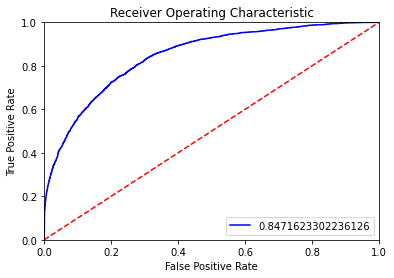

In [50]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')   #positon of auc value in graph
plt.plot([0, 1], [0, 1],'r--')    #linear line from 0,0 to 1,1
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

In [51]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [52]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)    #AUC value
print(fpr)    #fpr(1-mean specificity) i.e.(1-recall of class 0)
print(tpr)    #tpr(1-mean sensitivity) i.e.(1-recall of class 1)

0.7111797904354192
[0.         0.07419847 1.        ]
[0.         0.49655805 1.        ]


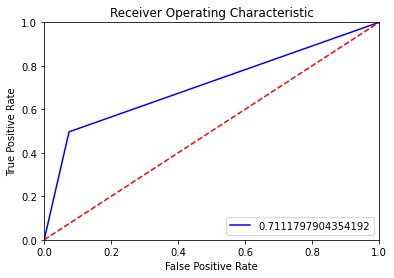

In [53]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()
#select higher auc value of threshold. the auc value of selected threshold value should near to the overall auc value.

In [54]:
#AUC:
#1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. 
#It will try and test various different thresholds and end up giving a proper ROC curve.
#2. Try generating the AUC value on the basis of individual thresholds.
#(try only upon the ambiguous thresholds which end up giving you almost the same error)
#3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.

# Using SGD Classifier

In [55]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                        eta0=0.1,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)
#fitting training data to the model
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
#print(list(zip(y_test,y_pred)))
#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

In [56]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[5941  609]
 [1096 1083]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6550
           1       0.64      0.50      0.56      2179

    accuracy                           0.80      8729
   macro avg       0.74      0.70      0.72      8729
weighted avg       0.79      0.80      0.80      8729

Accuracy of the model:  0.8046740749226715


In [57]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                        eta0=0.01,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=7)
#fitting training data to the model
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [58]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6168  382]
 [1192  987]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.56      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.70      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.819681521365563


# Cross Validation

In [59]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=x_train,
                                                 y=y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.81492391 0.80805106 0.82032401 0.83799705 0.83210604 0.82621502
 0.82326951 0.82367387 0.82760314 0.80992141]
0.8224085026228911


In [60]:
#model tuning
 
for train_value, test_value in kfold_cv.split(x_train):
    classifier.fit(x_train[train_value], y_train[train_value]).predict(x_train[test_value])
 
    
y_pred=classifier.predict(x_test)
#print(list(zip(Y_test,Y_pred)))

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print()
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6179  371]
 [1205  974]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.70      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8194524000458243


In [62]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=x_train,
                                                 y=y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.8119784  0.81492391 0.82916053 0.82621502 0.81885125 0.82965145
 0.81836033 0.82367387 0.82760314 0.82514735]
0.8225565254963915


In [63]:
#model tuning
 
for train_value, test_value in kfold_cv.split(x_train,y_train):
    classifier.fit(x_train[train_value], y_train[train_value]).predict(x_train[test_value])
 
    
y_pred=classifier.predict(x_test)
#print(list(zip(Y_test,Y_pred)))

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print()
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6179  371]
 [1215  964]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8183067934471303


In [66]:
#Recursive Feature Elimination:
#1st-All the independent variables (X) will be considered and the model will be built.
#It will eliminate the variable which has the least significance in the model.
#2nd-(X-1) variables will be considered and the model will be rebuilt.
#The process continues till the time we are left off with the given no of variables in the model.
#RFE model will be ready to predict upon the testing data.

In [74]:
colname=adult_df_rev.columns

 

from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=10)
model_rfe = rfe.fit(x_train, y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  10
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 1 1 1 3 1 1 1 1 1 1 2]


In [75]:
y_pred=model_rfe.predict(x_test)
#print(list(zip(y_test,y_pred)))

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print()
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6178  372]
 [1209  970]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8188795967464773


In [77]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables,
#create a  new df manually by subsetting the vaiables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

In [78]:
x=adult_df_rev.values[:,:-1]
y=adult_df_rev.values[:,-1]

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
 
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(x, y)
 
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
x = fit1.transform(x)

[6.43514578e+03 8.38585704e-02 2.22392549e+03 9.54508703e+02
 8.88429844e+01 3.15224157e+03 4.00047642e+01 4.63039738e+02
 7.82121650e+07 1.26463193e+06 5.94798702e+03 2.58715403e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [81]:
from sklearn.model_selection import train_test_split
#split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

In [82]:
#build the model
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [83]:
print(list(zip(y_test,y_pred)))
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0),

In [84]:
#evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[6179  371]
 [1205  974]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.70      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8194524000458243


In [86]:
x=adult_df_rev.values[:,:-1]
y=adult_df_rev.values[:,-1]

In [89]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.2)
fit1 = vt.fit(x, y)
print(fit1.variances_)
 
features = fit1.transform(x)
print(features.shape[1])
print(list(zip(adult_df_rev.columns,fit1.get_support())))

[1.87331831e+02 1.34142046e+00 6.99680880e+00 2.36140664e+00
 1.57295807e+01 2.63582948e+00 7.83695921e-01 2.23928894e-01
 6.04987082e+07 1.79776802e+05 1.62185295e+02 4.06168170e+01]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
